In [14]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from keras import regularizers

import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [6]:
model = Sequential()

In [7]:
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [9]:
model.compile(
    optimizer=RMSprop(lr=0.0001), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [10]:
partial_x_train.shape

(24000, 10000)

In [11]:
no_re_history = model.fit(partial_x_train, partial_y_train, 
                          epochs=50, 
                          batch_size=512, 
                          validation_data=(x_val, y_val))

Train on 24000 samples, validate on 1000 samples
Epoch 1/50
24000/24000 [==============================] - 2s 79us/step - loss: 0.6723 - acc: 0.6239 - val_loss: 0.6389 - val_acc: 0.7670
Epoch 2/50
24000/24000 [==============================] - 1s 58us/step - loss: 0.6072 - acc: 0.7838 - val_loss: 0.5752 - val_acc: 0.8330
Epoch 3/50
24000/24000 [==============================] - ETA: 0s - loss: 0.5436 - acc: 0.838 - 1s 57us/step - loss: 0.5421 - acc: 0.8391 - val_loss: 0.5156 - val_acc: 0.8410
Epoch 4/50
24000/24000 [==============================] - 1s 57us/step - loss: 0.4824 - acc: 0.8619 - val_loss: 0.4645 - val_acc: 0.8510
Epoch 5/50
24000/24000 [==============================] - 1s 57us/step - loss: 0.4314 - acc: 0.8765 - val_loss: 0.4212 - val_acc: 0.8560
Epoch 6/50
24000/24000 [==============================] - 1s 56us/step - loss: 0.3889 - acc: 0.8868 - val_loss: 0.3862 - val_acc: 0.8610
Epoch 7/50
24000/24000 [==============================] - 1s 59us/step - loss: 0.3542 - acc

In [12]:
model2 = Sequential()

model2.add(Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(
    optimizer=RMSprop(lr=0.0001), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

re_history = model2.fit(partial_x_train, partial_y_train, 
                          epochs=50, 
                          batch_size=512, 
                          validation_data=(x_val, y_val))

Train on 24000 samples, validate on 1000 samples
Epoch 1/50
24000/24000 [==============================] - 1s 61us/step - loss: 0.7071 - acc: 0.6356 - val_loss: 0.6674 - val_acc: 0.7150
Epoch 2/50
24000/24000 [==============================] - 1s 56us/step - loss: 0.6250 - acc: 0.7842 - val_loss: 0.5881 - val_acc: 0.7990
Epoch 3/50
24000/24000 [==============================] - 1s 56us/step - loss: 0.5476 - acc: 0.8413 - val_loss: 0.5219 - val_acc: 0.8340
Epoch 4/50
24000/24000 [==============================] - 1s 56us/step - loss: 0.4848 - acc: 0.8676 - val_loss: 0.4703 - val_acc: 0.8590
Epoch 5/50
24000/24000 [==============================] - 1s 55us/step - loss: 0.4363 - acc: 0.8825 - val_loss: 0.4315 - val_acc: 0.8630
Epoch 6/50
24000/24000 [==============================] - 1s 56us/step - loss: 0.3991 - acc: 0.8924 - val_loss: 0.4016 - val_acc: 0.8660
Epoch 7/50
24000/24000 [==============================] - 1s 56us/step - loss: 0.3697 - acc: 0.8999 - val_loss: 0.3788 - val_acc:

In [15]:
model3 = Sequential()
model3.add(Dense(16, activation='relu', input_shape=(10000,)))
model3.add(Dropout(0.5))
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(
    optimizer=RMSprop(lr=0.0001), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

do_history = model3.fit(partial_x_train, partial_y_train, 
                        epochs=50, 
                        batch_size=512, 
                        validation_data=(x_val, y_val))

Train on 24000 samples, validate on 1000 samples
Epoch 1/50
24000/24000 [==============================] - 1s 62us/step - loss: 0.6908 - acc: 0.5255 - val_loss: 0.6806 - val_acc: 0.6480
Epoch 2/50
24000/24000 [==============================] - 1s 55us/step - loss: 0.6740 - acc: 0.5748 - val_loss: 0.6541 - val_acc: 0.7220
Epoch 3/50
24000/24000 [==============================] - 1s 57us/step - loss: 0.6553 - acc: 0.6142 - val_loss: 0.6249 - val_acc: 0.7680
Epoch 4/50
24000/24000 [==============================] - 1s 58us/step - loss: 0.6318 - acc: 0.6552 - val_loss: 0.5956 - val_acc: 0.8040
Epoch 5/50
24000/24000 [==============================] - 1s 57us/step - loss: 0.6114 - acc: 0.6789 - val_loss: 0.5701 - val_acc: 0.8230
Epoch 6/50
24000/24000 [==============================] - 1s 56us/step - loss: 0.5895 - acc: 0.7015 - val_loss: 0.5426 - val_acc: 0.8280
Epoch 7/50
24000/24000 [==============================] - 1s 54us/step - loss: 0.5693 - acc: 0.7240 - val_loss: 0.5164 - val_acc:

In [18]:
import matplotlib.pyplot as plt

In [16]:
no_re_his_dict = no_re_history.history
re_his_dict = re_history.history
do_his_dict = do_history.history

In [17]:
no_re_his_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
no_val_loss = no_re_his_dict['val_loss']
val_loss = re_his_dict['val_loss']
do_loss = do_his_dict['val_loss']
epochs = range(1, len(no_val_loss) + 1)

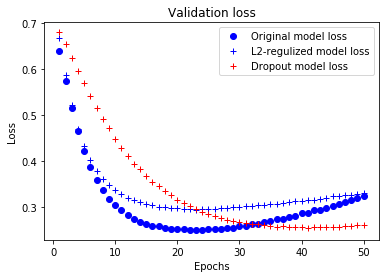

In [20]:
plt.plot(epochs, no_val_loss, 'bo', label='Original model loss')
plt.plot(epochs, val_loss, 'b+', label='L2-regulized model loss')
plt.plot(epochs, do_loss, 'r+', label='Dropout model loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

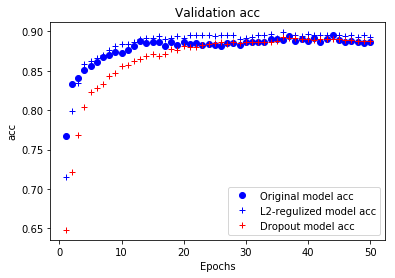

In [21]:
plt.clf()

no_val_acc = no_re_his_dict['val_acc']
val_acc = re_his_dict['val_acc']
do_acc = do_his_dict['val_acc']
epochs = range(1, len(no_val_acc) + 1)

plt.plot(epochs, no_val_acc, 'bo', label='Original model acc')
plt.plot(epochs, val_acc, 'b+', label='L2-regulized model acc')
plt.plot(epochs, do_acc, 'r+', label='Dropout model acc')
plt.title('Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()